In [20]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

Here, we'll define our progressivity levels for our plots

In [1]:
progressivity_levels_tax_rates = {'1': [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
                                  '2': [0.3, 0.32, 0.342, 0.364, 0.407, 0.458],
                                  '3': [0.2, 0.24, 0.284, 0.328, 0.439, 0.515],
                                  '4': [0.1, 0.14, 0.204, 0.278, 0.464, 0.585],
                                  '5': [0, 0, 0.06, 0.263, 0.531, 0.664]}
progressivity_levels_tax_percents = {'1': [item*100 for item in progressivity_levels_tax_rates['1']],
                                     '2': [item*100 for item in progressivity_levels_tax_rates['2']],
                                     '3': [item*100 for item in progressivity_levels_tax_rates['3']],
                                     '4': [item*100 for item in progressivity_levels_tax_rates['4']],
                                     '5': [item*100 for item in progressivity_levels_tax_rates['5']]}
complete_bars = {'1': [100-item for item in progressivity_levels_tax_percents['1']],
                 '2': [100-item for item in progressivity_levels_tax_percents['2']],
                 '3': [100-item for item in progressivity_levels_tax_percents['3']],
                 '4': [100-item for item in progressivity_levels_tax_percents['4']],
                 '5': [100-item for item in progressivity_levels_tax_percents['5']]}

## Subplots for tax rates (depending on income)

<IPython.core.display.Javascript object>


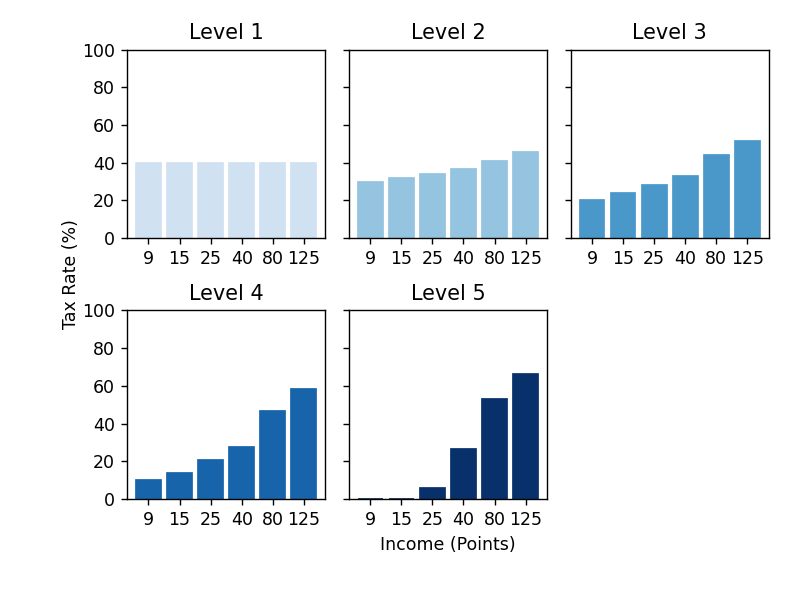

In [35]:
from matplotlib.figure import Figure

# creating a set of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

axs = [ax1,ax2,ax3,ax4,ax5] # storing a subplot for each progressivity level

c = np.arange(1, len(axs) + 2) # defining a scale for barchat colormap
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max()) # normalizing our scale
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues) # creating a shades of blue colormap
cmap.set_array([])

# plotting all subplots
for n_axis in range(1, len(axs) + 1):
    yvals = progressivity_levels_tax_percents[f'{n_axis}'] # calling our tax rates for a progressivity level
    axs[n_axis-1].bar(range(1, 7), yvals, width = 0.8)
    
    # changing the color of all bars in a subplot
    for bar_num in range(1, 7):
        axs[n_axis-1].get_children()[bar_num-1].set_color(cmap.to_rgba(n_axis+1))
        
    axs[n_axis-1].set_ylim(0, 100) # setting the y axis limit from 0% to 100%
    axs[n_axis-1].set_title(f"Level {n_axis}") # setting the title of each subplot as to their respective level

ax6.axis('off') # hiding unnecesessary 6th subplot

# hiding big subplot tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.tight_layout(pad=1.0)

# stablishing the x and y titles
plt.ylabel("Tax Rate (%)")
plt.xlabel("Income (Points)")
#plt.title("Progressivity Levels")

# setting up the progressivity plots
plt.setp(axs, xticks=list(range(1, 7)), xticklabels=['9', '15', '25', '40', '80', '125']) 

fig.tight_layout(pad=1.0) # adding some spacing between subplots
fig.savefig('First display.png')

## Subplots for income and taxrates in combined barplot

<IPython.core.display.Javascript object>


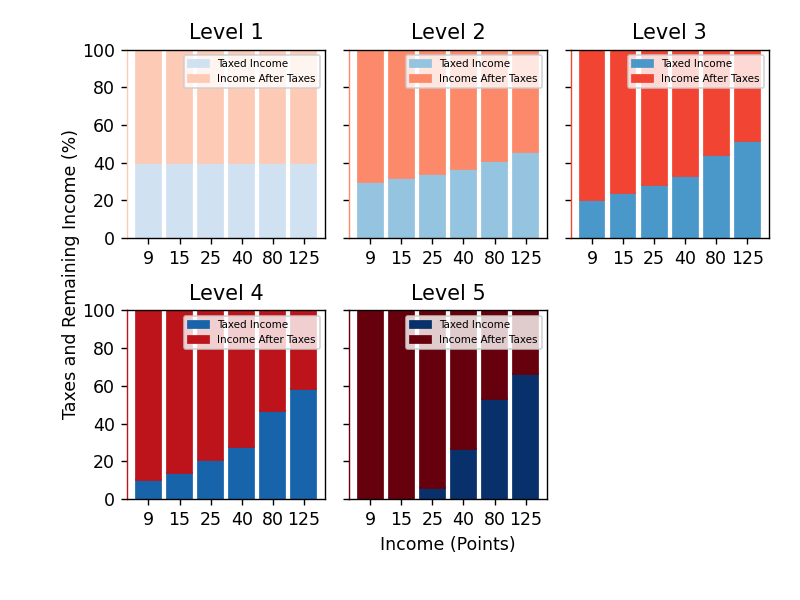

In [34]:
from matplotlib.figure import Figure

# creating a set of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

axs = [ax1,ax2,ax3,ax4,ax5] # storing a subplot for each progressivity level

c = np.arange(1, len(axs) + 2) # defining a scale for barchat colormap
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max()) # normalizing our scale
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues) # creating a shades of blue colormap for bottom bars
cmap.set_array([])
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds) # creating a shades of blue colormap for top bars
cmap2.set_array([])


# plotting all subplots
for n_axis in range(1, len(axs) + 1):
    yvals = progressivity_levels_tax_percents[f'{n_axis}'] # calling our tax rates for a progressivity level
    op_yvals = complete_bars[f'{n_axis}']
    p1 = axs[n_axis-1].bar(range(1, 7), yvals, width = 0.8)
    p2 = axs[n_axis-1].bar(range(1, 7), op_yvals,bottom=yvals, width = 0.8)
    
    # changing the color of bottom bars in a subplot
    for bar_num in range(1, 7):
        axs[n_axis-1].get_children()[bar_num-1].set_color(cmap.to_rgba(n_axis+1))
    
    # changing the color of top bars in a subplot
    for bar_num in range(7, 14):
        axs[n_axis-1].get_children()[bar_num-1].set_color(cmap2.to_rgba(n_axis+1))
    
    axs[n_axis-1].set_ylim(0, 100) # setting the y axis limit from 0% to 100%
    axs[n_axis-1].set_title(f"Level {n_axis}") # setting the title of each subplot as to their respective level
    
#     red_patch = mpatches.Patch(label='Income after Taxes').set_color(cmap2.to_rgba(n_axis+1))
#     blue_patch = mpatches.Patch(label='Taxed Income').set_color(cmap.to_rgba(n_axis+1))
    axs[n_axis-1].legend([p1, p2], ['Taxed Income', 'Income After Taxes'], loc='upper right', prop={'size': 6})

ax6.axis('off') # hiding unnecesessary 6th subplot

# hiding big subplot tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.tight_layout(pad=1.0)

# stablishing the x and y titles
plt.ylabel("Taxes and Remaining Income (%)")
plt.xlabel("Income (Points)")
#plt.title("Progressivity Levels")

# setting up the progressivity plots
plt.setp(axs, xticks=list(range(1, 7)), xticklabels=['9', '15', '25', '40', '80', '125'])

# legend
# red_patch = mpatches.Patch(color='red', label='Income after Taxes').set_color
# blue_patch = mpatches.Patch(color='blue', label='Taxed Income')
#plt.legend(handles=[red_patch, blue_patch], )

fig.tight_layout(pad=1.0) # adding some spacing between subplots
fig.savefig('Second display.png')